# Project 1

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [5]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [6]:
data.shape

(500000, 6)

In [7]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


In [8]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 5 columns):
Year       250000 non-null int64
Mileage    250000 non-null int64
State      250000 non-null object
Make       250000 non-null object
Model      250000 non-null object
dtypes: int64(2), object(3)
memory usage: 11.4+ MB


In [10]:
data_train2= data
data_train2["State2"]=pd.DataFrame(data_train2.State.astype("category").cat.codes)
data_train2["Make2"]=pd.DataFrame(data_train2.Make.astype("category").cat.codes)
data_train2["Model2"]=pd.DataFrame(data_train2.Model.astype("category").cat.codes)
data_train2=data_train2.drop(["Make","State","Model"], axis=1)
data_train2.head()

,Price,Year,Mileage,State2,Make2,Model2
0,21490,2014,31909,20,27,305
1,21250,2016,25741,17,6,83
2,20925,2016,24633,40,14,400
3,14500,2012,84026,36,17,248
4,32488,2013,22816,42,17,489


In [11]:
data_test3= data_test
data_test3["State2"]=pd.DataFrame(data_test3.State.astype("category").cat.codes)
data_test3["Make2"]=pd.DataFrame(data_test3.Make.astype("category").cat.codes)
data_test3["Model2"]=pd.DataFrame(data_test3.Model.astype("category").cat.codes)
data_test3=data_test3.drop(["Make","State","Model"], axis=1)
data_test3.head()

,Year,Mileage,State2,Make2,Model2
ID,,,,,
0,2015,23388,35,10,165
1,2014,45061,38,10,169
2,2007,101033,48,36,85
3,2015,13590,11,17,489
4,2009,118916,5,8,99


In [13]:
data_test3.columns.difference(data_train2.columns)

Index([], dtype='object')

### Submission example

In [14]:
X = data_train2.drop(['Price'], axis=1)
y = data_train2['Price']
# train/test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

max_depth_range = range(1, 25)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []
accuracy_scores=[]

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = BaggingRegressor(DecisionTreeRegressor(max_depth=depth, random_state=1), n_estimators=100, bootstrap=True, random_state=1)
    #treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    #accuracy_scores.append(cross_val_score(treereg, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0,0.5,'RMSE (lower is better)')

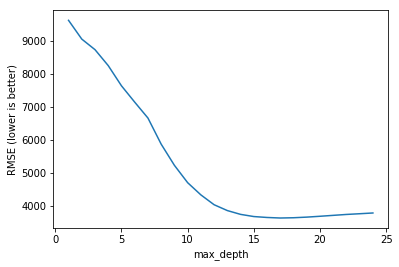

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [29]:
R_Mean_Squared_Error=pd.DataFrame({"RMSE":RMSE_scores},index=RMSE_scores.Shape)
R_Mean_Squared_Error
#RMSE_scores==np.min(RMSE_scores)17-3628.59

[9629.927454496259,
 9060.388635705056,
 8739.421696101144,
 8254.994316303282,
 7641.996051619926,
 7146.222542994359,
 6663.689884667964,
 5870.86709826403,
 5228.017039906467,
 4701.333522685238,
 4330.66387470523,
 4031.6799011858834,
 3854.4248551096075,
 3738.9985574013513,
 3672.9279868281947,
 3644.9485951645574,
 3628.592424381677,
 3636.601617549983,
 3655.581735182423,
 3681.381006953526,
 3709.0748378871845,
 3736.7819800706093,
 3758.5092661906806,
 3781.1474413762603]

In [22]:
# Train all the models
X_train = data_train.drop(['Price'], axis=1)
y_train = data_train['Price']

for model in models.keys():
    models[model].fit(X_train, y_train)

In [23]:
# predict test for each model
y_pred = pd.DataFrame(index=data_test2.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(data_test2)
y_pred    

,lr,dtree
ID,,
0,17967.830582,15928.0
1,15665.146619,17995.0
2,5833.325062,8715.0
3,36039.132950,34444.0
4,10652.528374,11950.0
5,4279.562674,10547.0
6,5199.123977,16995.0
7,26967.109611,19995.0
8,17590.081010,13954.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
for model in models.keys():
    print(model)
    print('MSE:',np.sqrt(metrics.mean_squared_error(y_pred[model], y_test)))
    print('f1-score:',metrics.f1_score(y_pred[model], y_test), 'ACC:',metrics.accuracy_score(y_pred[model], y_test))

In [ ]:
y_pred.to_csv('test_submission.csv', index_label='ID')

In [ ]:
y_pred.head()

# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
